In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

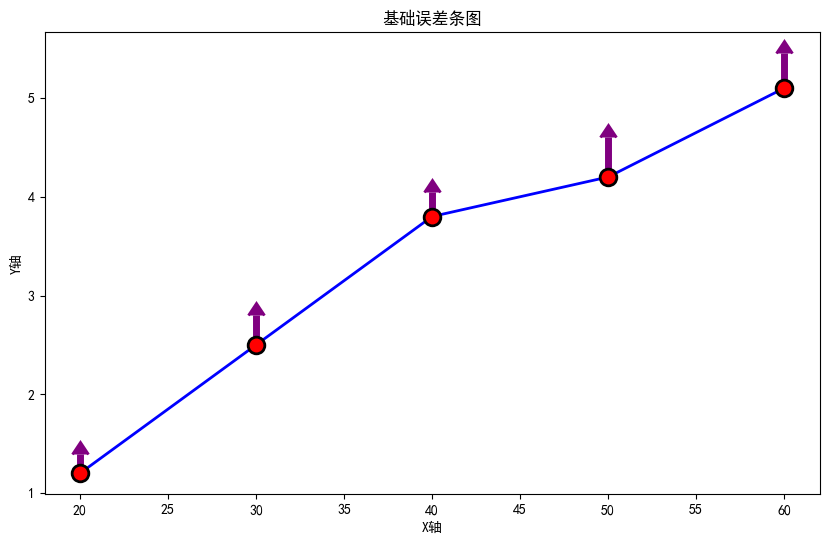

In [3]:
# 模拟数据
x = [20, 30, 40, 50, 60]
y = [1.2, 2.5, 3.8, 4.2, 5.1]
y_err = [0.2, 0.3, 0.25, 0.4, 0.35]

plt.figure(figsize=(10, 6))
# 绘制误差条图
plt.errorbar(
            x,                      # x轴数据
            y,                      # y轴数据
            yerr=y_err,             # y方向的误差范围
            fmt='o-',               # 样式控制
            capsize=6,              # 误差条两端帽子的长度（单位：点）
            lolims=True,            # 仅显示y轴误差的下限（只绘制向上的箭头）
            linewidth=2,            # 数据点连接线的宽度
            elinewidth=5,           # 误差条线条的宽度
            markersize=12,          # 数据点标记的大小
            markerfacecolor='red',  # 数据点标记的填充颜色
            markeredgecolor='k',    # 数据点标记的边缘颜色
            markeredgewidth=2,      # 数据点标记的边缘宽度
            color='blue',           # 数据点连接线的颜色
            ecolor='purple'         # 误差条的颜色
            )

plt.title('基础误差条图')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.show()

# 2、使用示例：

### 示例 1：双向误差条+非对称误差条

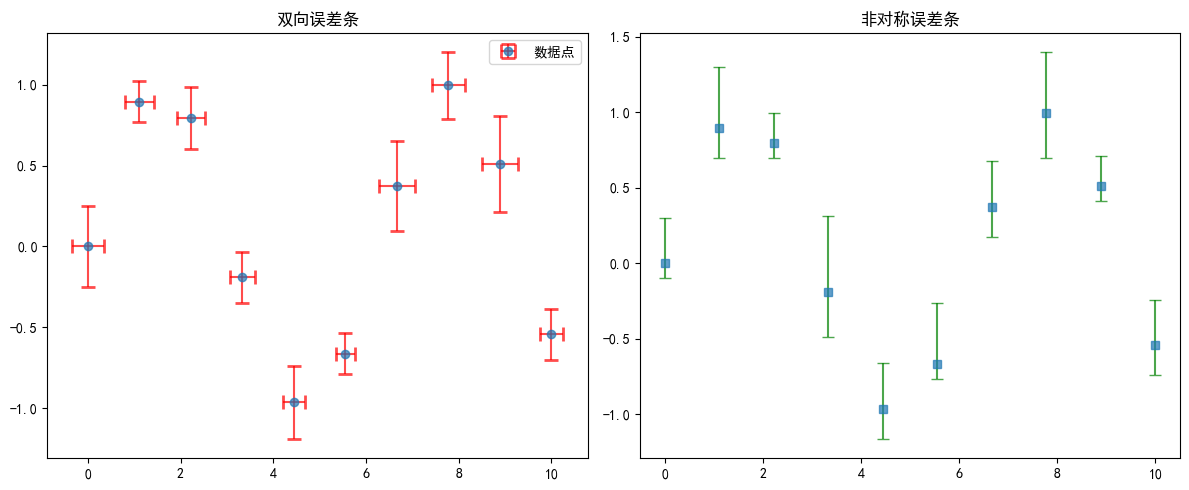

In [4]:
# 创建数据
x = np.linspace(0, 10, 10)
y = np.sin(x)
y_err = np.random.uniform(0.1, 0.3, size=10)
x_err = np.random.uniform(0.2, 0.4, size=10)

# 创建图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 子图1：双向误差条
ax1.errorbar(x, y, 
             xerr=x_err,    # x方向的误差范围
             yerr=y_err,    # y方向的误差范围
             fmt='o', 
             capsize=5, 
             capthick=2, 
             ecolor='red',
             alpha=0.7, 
             label='数据点'
            )
ax1.set_title('双向误差条')
ax1.legend()

# 子图2：非对称误差条
y_err_lower = [0.1, 0.2, 0.1, 0.3, 0.2, 0.1, 0.2, 0.3, 0.1, 0.2]
y_err_upper = [0.3, 0.4, 0.2, 0.5, 0.3, 0.4, 0.3, 0.4, 0.2, 0.3]
# 组合成非对称误差的二维数组（[下限误差, 上限误差]）
asymmetric_error = [y_err_lower, y_err_upper]

ax2.errorbar(x, y, 
             yerr=asymmetric_error,    # 使用非对称误差（仅y方向）
             fmt='s',
             capsize=4, 
             ecolor='green', 
             alpha=0.7
            )
ax2.set_title('非对称误差条')

plt.tight_layout()
plt.show()

### 示例 2：根据返回值修改样式

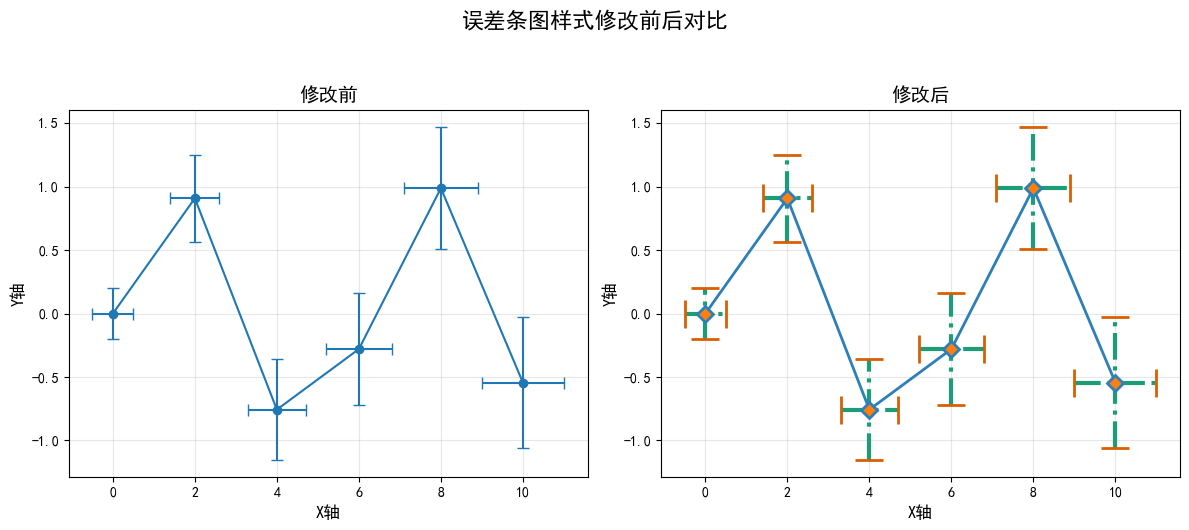

In [5]:
# 生成示例数据
x = np.linspace(0, 10, 6)
y = np.sin(x)
yerr = 0.2 + 0.1 * np.sqrt(x)
xerr = 0.5 + 0.05 * x

# 创建2个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
fig.suptitle('误差条图样式修改前后对比', fontsize=16, y=1.05)

# 第一个子图：原始样式
ax1.set_title('修改前', fontsize=14)
ax1.errorbar(
    x, y, 
    xerr=xerr, yerr=yerr,
    fmt='o-',  
    capsize=4  
)
ax1.set_xlabel('X轴', fontsize=12)
ax1.set_ylabel('Y轴', fontsize=12)
ax1.grid(alpha=0.3)

# 第二个子图：修改后样式
ax2.set_title('修改后', fontsize=14)
plotline, caplines, barlinecols = ax2.errorbar(
    x, y, 
    xerr=xerr, yerr=yerr,
    fmt='o-', 
    capsize=4 
)

# 修改数据线和数据点样式
plotline.set_color('#2c7fb8')             # 数据线颜色
plotline.set_linewidth(2)                 # 数据线宽度
plotline.set_marker('D')                  # 数据点标记
plotline.set_markersize(8)                # 数据点大小
plotline.set_markerfacecolor('#ff7f0e')   # 数据点填充色
plotline.set_markeredgewidth(2)           # 数据点边缘宽度

# 修改误差条帽子样式
for cap in caplines:
    cap.set_color('#d95f02')              # 帽子颜色
    cap.set_markersize(20)                # 帽子大小
    cap.set_markeredgewidth(2)            # 帽子线宽

# 修改误差条线条样式
for bar in barlinecols:
    bar.set_color('#1b9e77')              # 误差条颜色
    bar.set_linestyle('-.')               # 误差条线条样式
    bar.set_linewidth(3)                  # 误差条线宽

ax2.set_xlabel('X轴', fontsize=12)
ax2.set_ylabel('Y轴', fontsize=12)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()